### PART1

In [2]:
import numpy as np
import pandas as pd
import os
import zipfile
import requests
import json 
from bs4 import BeautifulSoup 
import boto3 
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [3]:
url = 'https://ies-fsv.s3.eu-central-1.amazonaws.com/studentsSets/45247808.zip'
response = requests.get(url)

with open('data.zip', 'wb') as file:
    file.write(response.content)

In [4]:
zip_file_path = 'data.zip'
with zipfile.ZipFile(zip_file_path, 'r') as z:
    print(z.namelist())

['data/MU.csv', 'data/MCD.csv', 'data/LIN.csv', 'data/DXCM.csv']


In [9]:
os.listdir('.')

['Midterm_solution.ipynb', '.DS_Store', 'data.zip', '.git', 'data']

In [33]:
df_MU=pd.read_csv('data/MU.csv',parse_dates=["Date"], date_format="%d-%m-%y")
df_MCD=pd.read_csv('data/MCD.csv',parse_dates=["Date"], date_format="%d-%m-%y")
df_LIN=pd.read_csv('data/LIN.csv',parse_dates=["Date"], date_format="%d-%m-%y")
df_DXCM=pd.read_csv('data/DXCM.csv',parse_dates=["Date"], date_format="%d-%m-%y")

In [34]:
df_MU['company']='MU'
df_MCD['company']='MCD'
df_LIN['company']='LIN'
df_DXCM['company']='DXCM'

In [35]:
df_MU.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company
0,2017-01-03,21.632,22.289,21.613,22.103,24962900,0.0,0.0,MU
1,2017-01-04,22.220,22.387,21.809,21.917,20426800,0.0,0.0,MU
2,2017-01-05,21.956,22.122,21.524,21.671,19759400,0.0,0.0,MU
3,2017-01-06,21.828,21.838,21.544,21.603,17782200,0.0,0.0,MU
4,2017-01-09,21.505,22.103,21.505,21.897,21537200,0.0,0.0,MU


In [36]:
df_MCD.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company
0,2017-01-03,101.373,101.490,98.961,99.510,5123800,0.0,0.0,MCD
1,2017-01-04,98.994,99.610,98.312,99.393,3780800,0.0,0.0,MCD
2,2017-01-05,99.277,99.992,99.077,99.576,4261100,0.0,0.0,MCD
3,2017-01-06,98.936,101.074,98.595,100.458,4089200,0.0,0.0,MCD
4,2017-01-09,100.458,100.708,100.100,100.184,3021800,0.0,0.0,MCD


In [81]:
df_merged=pd.concat([df_MU,df_MCD,df_LIN,df_DXCM], axis=0, ignore_index=True).sort_values('Date')
df_merged.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company
0,2017-01-03,21.632,22.289,21.613,22.103,24962900,0.0,0.0,MU
3020,2017-01-03,103.284,103.503,101.664,102.347,2364200,0.0,0.0,LIN
4530,2017-01-03,14.875,14.913,14.440,14.562,5717200,0.0,0.0,DXCM
1510,2017-01-03,101.373,101.490,98.961,99.510,5123800,0.0,0.0,MCD
1,2017-01-04,22.220,22.387,21.809,21.917,20426800,0.0,0.0,MU


#### TASK1

In [28]:
df_filtered = df_merged[df_merged['High'] == df_merged['Low']]

In [41]:
df_filtered.size
#no such company

0

### Task2

In [39]:
#highest price
df_merged.loc[df_merged.groupby('company')['High'].idxmax()][['company','High']]

,company,High
5759,DXCM,164.863
4517,LIN,339.753
2985,MCD,269.020
1261,MU,96.735


In [40]:
#lowest price
df_merged.loc[df_merged.groupby('company')['High'].idxmin()][['company','High']]

,company,High
4737,DXCM,11.195
3022,LIN,101.901
1511,MCD,99.610
9,MU,21.632


### TASK3

In [82]:
df_merged['close_lag']=df_merged.groupby('company')['Close'].shift(1)
df_merged['log_returns'] = np.log(df_merged['Close'] / df_merged['close_lag'])
df_merged.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company,close_lag,log_returns
0,2017-01-03,21.632,22.289,21.613,22.103,24962900,0.0,0.0,MU,NaN,NaN
3020,2017-01-03,103.284,103.503,101.664,102.347,2364200,0.0,0.0,LIN,NaN,NaN
4530,2017-01-03,14.875,14.913,14.440,14.562,5717200,0.0,0.0,DXCM,NaN,NaN
1510,2017-01-03,101.373,101.490,98.961,99.510,5123800,0.0,0.0,MCD,NaN,NaN
1,2017-01-04,22.220,22.387,21.809,21.917,20426800,0.0,0.0,MU,22.103,-0.008451


In [53]:
mean_log_returns = df_merged.groupby('company')['log_returns'].mean()
min_log_returns = df_merged.groupby('company')['log_returns'].min()
max_log_returns = df_merged.groupby('company')['log_returns'].max()
std_log_returns = df_merged.groupby('company')['log_returns'].std()
skew_log_returns = df_merged.groupby('company')['log_returns'].skew()

In [54]:
df_stats = pd.concat([mean_log_returns, min_log_returns, max_log_returns,std_log_returns,skew_log_returns], axis=1)
df_stats.columns = ['log_rts_mean', 'log_rts_min', 'log_rts_max', 'log_rts_std', 'log_rts_skew']
df_stats

,log_rts_mean,log_rts_min,log_rts_max,log_rts_std,log_rts_skew
company,,,,,
DXCM,0.001359,-0.395320,0.267349,0.031777,-0.457744
LIN,0.000753,-0.108516,0.110601,0.016113,-0.069120
MCD,0.000619,-0.172874,0.166576,0.014206,-0.261622
MU,0.000534,-0.220880,0.125220,0.029148,-0.340290


### Task 4

### Task 5

In [90]:
#median for each week
df2=df_merged.copy()
df2['Date'] = pd.to_datetime(df2['Date'])

In [91]:
df2.set_index('Date', inplace=True) 
weekly_volume_avg = df2.groupby('company').resample('W')['Volume'].median()

In [92]:
pd.DataFrame(weekly_volume_avg).groupby('company').head()

Volume
company Date                  
DXCM    2017-01-08   6141400.0
        2017-01-15   7846800.0
        2017-01-22   8296200.0
        2017-01-29   3907600.0
        2017-02-05   3121600.0
LIN     2017-01-08   1832000.0
        2017-01-15   1088300.0
        2017-01-22   1405350.0
        2017-01-29   1980500.0
        2017-02-05   1356800.0
MCD     2017-01-08   4175150.0
        2017-01-15   3108400.0
        2017-01-22   3736300.0
        2017-01-29   3592700.0
        2017-02-05   3236600.0
MU      2017-01-08  20093100.0
        2017-01-15  20907700.0
        2017-01-22  20016250.0
        2017-01-29  19379100.0
        2017-02-05  28728200.0

### Task6

In [62]:
df_merged.groupby('company')['log_returns'].sum().idxmax()

'DXCM'

### Task 8

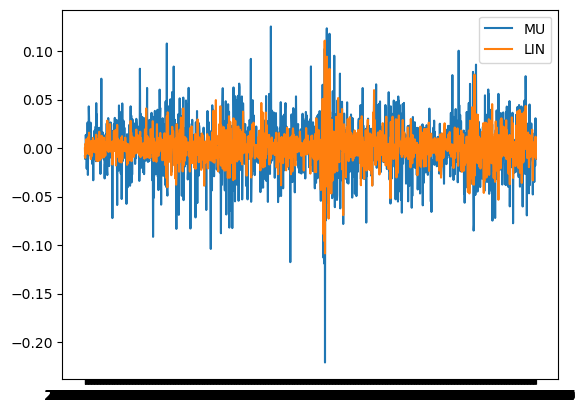

In [ ]:
#a
MU_plot=df_merged[df_merged['company']=='MU']
LIN_plot=df_merged[df_merged['company']=='LIN']


plt.plot(MU_plot['Date'],MU_plot['log_returns'], label='MU')
plt.plot(LIN_plot['Date'],LIN_plot['log_returns'], label='LIN')
plt.legend()

<Axes: xlabel='log_returns', ylabel='Count'>

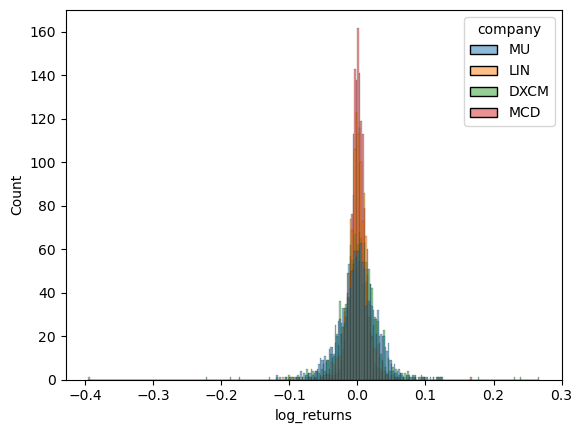

In [88]:
#b
sns.histplot(data=df_merged, x="log_returns", hue="company")

### PART2

In [98]:
#TASK1
data2=pd.read_csv("https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv")
data2.head()

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981


In [101]:
data2['included']=pd.to_datetime(data2['included'], format='%d.%m.%Y',errors='coerce')

In [102]:
data2.head()

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",1964-03-31,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",2018-05-31,1981


In [103]:
data2['included'].isna().sum()

48

In [104]:
##Task2
data2=data2.dropna(subset=['included'])


In [ ]:
data = data.dropna(subset="included")

In [106]:
data2['Founded']=pd.to_datetime(data2['Founded'],format='%Y', errors='coerce')
data2['Founded']=data2['Founded'].dt.year

In [107]:
today = datetime.datetime.today()
today_year = today.year
data2['age'] = today_year - data2['Founded']

In [110]:
data2.loc[data2["age"].idxmax()]

Symbol                              BK
Security                    BNY Mellon
GICS_Sector                 Financials
hq             New York City, New York
included           1995-03-31 00:00:00
Founded                         1784.0
age                              241.0
Name: 71, dtype: object

In [111]:
data2.loc[data2["age"].idxmin()]

Symbol                             WBD
Security        Warner Bros. Discovery
GICS_Sector     Communication Services
hq             New York City, New York
included           2022-04-11 00:00:00
Founded                         2022.0
age                                3.0
Name: 481, dtype: object

In [121]:
#Task3
counts=data2['GICS_Sector'].value_counts()
counts

GICS_Sector
Information Technology    68
Industrials               66
Health Care               60
Financials                55
Consumer Discretionary    52
Consumer Staples          33
Real Estate               29
Materials                 26
Communication Services    22
Utilities                 22
Energy                    22
Name: count, dtype: int64

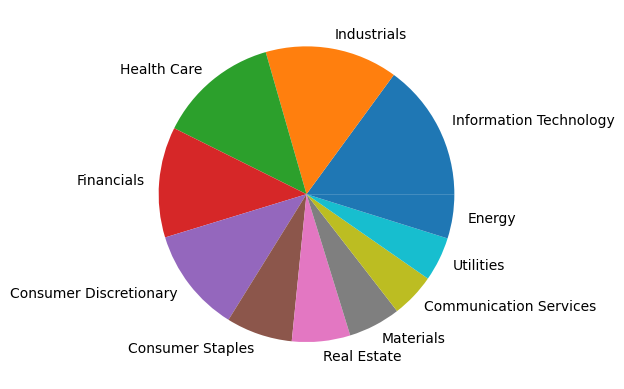

In [125]:
plt.pie(counts,labels=counts.index)
plt.show() 

In [139]:
#Task4
data2['state'] = data2['hq'].apply(lambda x: x.split(',')[-1])
data2.head()

,Symbol,Security,GICS_Sector,hq,included,Founded,age,index_str,extracted_state,state
0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09,1902.0,123.0,10,Minnesota,Minnesota
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26,1916.0,109.0,9,Wisconsin,Wisconsin
2,ABT,Abbott,Health Care,"North Chicago, Illinois",1964-03-31,1888.0,137.0,13,Illinois,Illinois
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31,NaN,NaN,13,Illinois,Illinois
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",2018-05-31,1981.0,44.0,7,Massachusetts,Massachusetts


In [145]:
c=data2['state'].value_counts()
c

state
 California                    65
 New York                      43
 Texas                         40
 Illinois                      31
 Pennsylvania                  19
 Massachusetts                 18
 Ohio                          17
 North Carolina                16
 Georgia                       16
 New Jersey                    15
 Virginia                      15
 Florida                       14
 Minnesota                     13
 Washington                    12
 Connecticut                   12
 Michigan                      10
 Tennessee                      7
 Colorado                       7
 Ireland                        7
 Missouri                       6
 Indiana                        6
 Wisconsin                      6
 Arizona                        5
 Maryland                       5
 Nevada                         4
 Oklahoma                       4
 United Kingdom                 4
 Rhode Island                   4
 Louisiana                      3
 Arkansa

In [129]:
#Task5
data_m=pd.read_csv("https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv")
data_m.head()

,Symbol,subindustry
0,MMM,Industrial Conglomerates
1,AOS,Building Products
2,ABT,Health Care Equipment
3,ABBV,Pharmaceuticals
4,ABMD,Health Care Equipment


In [130]:
data2_merged=pd.merge(data2,data_m, on="Symbol",how="outer")

In [131]:
data2_merged.head()

,Symbol,Security,GICS_Sector,hq,included,Founded,age,subindustry
0,A,Agilent Technologies,Health Care,"Santa Clara, California",2000-06-05,1999.0,26.0,Health Care Equipment
1,AAL,American Airlines Group,Industrials,"Fort Worth, Texas",2015-03-23,1934.0,91.0,Airlines
2,AAP,Advance Auto Parts,Consumer Discretionary,"Raleigh, North Carolina",2015-07-09,1932.0,93.0,Automotive Retail
3,AAPL,Apple Inc.,Information Technology,"Cupertino, California",1982-11-30,1977.0,48.0,"Technology Hardware, Storage & Peripherals"
4,ABBV,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31,NaN,NaN,Pharmaceuticals


In [ ]:
###Part 3
r = np.random.randn(100)